In [1]:
__author__ = 'Erwin Chen'
# %matplotlib nbagg
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
from astropy.io import fits
import numpy as np
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import v_measure_score
import cPickle as pickle
from sklearn.cluster import KMeans

In [2]:
# load data from fits file
hdulist = fits.open('allStar-v603.fits')
hdulist.info()
tbdata = hdulist[1].data
# APOGEE ID for stars
apogee_ID = tbdata.field('APOGEE_ID')
# Galactic Longitude
l = tbdata.field('GLON')
# Galactic Latitude 
b = tbdata.field('GLAT')
# Right Ascension(J2000)
RA = tbdata.field('RA')
# Declination(J2000)
DEC = tbdata.field('DEC')
# Heliocentric radial velocity
RV = tbdata.field('VHELIO_AVG')
J = tbdata.field('J')
H = tbdata.field('H')
K = tbdata.field('K')
LOGG = tbdata.field('LOGG')
TEFF = tbdata.field('TEFF')
# Proper Motion
PMRA = tbdata.field('PMRA')
PMDEC = tbdata.field('PMDEC')
# 15 elements
elements = np.array(["Al", "Ca", "C", "Fe", "K", "Mg", "Mn", "Na", "Ni", "N", "O", "Si", "S", "Ti", "V"])
AL_H = tbdata.field("AL_H")
CA_H = tbdata.field("CA_H")
C_H = tbdata.field("C_H")
FE_H = tbdata.field('FE_H')
K_H = tbdata.field("K_H")
MG_H = tbdata.field("MG_H")
MN_H = tbdata.field("MN_H")
NA_H = tbdata.field("NA_H")
NI_H = tbdata.field("NI_H")
N_H = tbdata.field("N_H")
O_H = tbdata.field("O_H")
SI_H = tbdata.field("SI_H")
S_H = tbdata.field("S_H")
TI_H = tbdata.field("TI_H")
V_H = tbdata.field("V_H")
# errors for 15 elements
AL_H_ERR = tbdata.field("AL_H_ERR")
CA_H_ERR = tbdata.field("CA_H_ERR")
C_H_ERR = tbdata.field("C_H_ERR")
FE_H_ERR = tbdata.field("FE_H_ERR")
K_H_ERR = tbdata.field("K_H_ERR")
MG_H_ERR = tbdata.field("MG_H_ERR")
MN_H_ERR = tbdata.field("MN_H_ERR")
NA_H_ERR = tbdata.field("NA_H_ERR")
NI_H_ERR = tbdata.field("NI_H_ERR")
N_H_ERR = tbdata.field("N_H_ERR")
O_H_ERR = tbdata.field("O_H_ERR")
SI_H_ERR = tbdata.field("SI_H_ERR")
S_H_ERR = tbdata.field("S_H_ERR")
TI_H_ERR = tbdata.field("TI_H_ERR")
V_H_ERR = tbdata.field("V_H_ERR")

Filename: allStar-v603.fits
No.    Name         Type      Cards   Dimensions   Format
0    PRIMARY     PrimaryHDU      15   ()              
1                BinTableHDU    324   163278R x 151C   [45A, 34A, 44A, 34A, 18A, 8A, I, 16A, E, E, E, E, E, E, D, D, D, D, J, J, 116A, J, I, E, J, 129A, J, 59A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 2E, 2E, 2E, 2E, 5A, 6A, 4A, I, 7E, 7E, 49E, 49E, 15E, 15E, 15E, 15E, E, E, E, E, E, E, E, E, E, 2A, J, 153A, 7J, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, J, J, J, J, J, J, J, J, J, J, J, J, J, J, J, 15E, 15J, 18A, 12A, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, E, 17A, E, E, I, I, E, E, 20A, 737A, 665A, 50J, 50J]   
2                ImageHDU         6   (360,)       int32   
3                BinTableHDU     31   1R x 4C      [105A, 30A, 90A, 15I]   


In [3]:
# get chemical abundances of 15 elements for selected stars
def get_matrix(C):
    data = []
    data.append(C_H[C])
    data.append(FE_H[C])
    data.append(N_H[C])
    data.append(O_H[C])
    data.append(MG_H[C])
    data.append(SI_H[C])
    data.append(NI_H[C])
    data.append(AL_H[C])
    data.append(CA_H[C])
    data.append(MN_H[C])
    data.append(NA_H[C])
    data.append(S_H[C])
    data.append(K_H[C])
    data.append(TI_H[C])
    data.append(V_H[C])
    data = np.array(data)
    data = data.T
    return data

# get chemical abundances normalized by mean error of 15 elements for selected stars
def get_matrix_normalized(C):
    data = []
    data.append(C_H[C] / np.mean(C_H_ERR[C]))
    data.append(FE_H[C] / np.mean(FE_H_ERR[C]))
    data.append(N_H[C] / np.mean(N_H_ERR[C]))
    data.append(O_H[C] / np.mean(O_H_ERR[C]))
    data.append(MG_H[C] / np.mean(MG_H_ERR[C]))
    data.append(SI_H[C] / np.mean(SI_H_ERR[C]))
    data.append(NI_H[C] / np.mean(NI_H_ERR[C]))
    data.append(AL_H[C] / np.mean(AL_H_ERR[C]))
    data.append(CA_H[C] / np.mean(CA_H_ERR[C]))
    data.append(MN_H[C] / np.mean(MN_H_ERR[C]))
    data.append(NA_H[C] / np.mean(NA_H_ERR[C]))
    data.append(S_H[C] / np.mean(S_H_ERR[C]))
    data.append(K_H[C] / np.mean(K_H_ERR[C]))
    data.append(TI_H[C] / np.mean(TI_H_ERR[C]))
    data.append(V_H[C] / np.mean(V_H_ERR[C]))
    data = np.array(data)
    data = data.T
    return data

# all stars with 15 elements
C = np.where(
        (LOGG > -9999.) * (TEFF > -9999.) * (RV < 999999.0) *
        (AL_H > -9999.) * (CA_H > -9999.) * (C_H > -9999.0) *
        (FE_H > -9999.) * (K_H > -9999.0) * (MG_H > - 9999.0) *
        (MN_H > -9999.) * (NA_H > -9999.0) * (NI_H > -9999.) *
        (N_H > -9999.) * (O_H > -9999.0) * (SI_H > -9999.) *
        (S_H > -9999.) * (TI_H > -9999.) * (V_H > -9999.))[0]

In [4]:
# compare the KMeans groups to known clusters 
# load known members
known_clusters = np.loadtxt('table4.dat', usecols=(0, 1), dtype=('S', 'S'), unpack=True)
# names of all known clusters
known_clusters_names = known_clusters[1]
# names of clusters with significant number of members
clusters_names = np.array(["M107", "M13", "M5", "N6819", "M67"])
# APOGEE IDs of all known members
known_clusters_ID = known_clusters[0]
# get all known members
members = np.array([np.where(ID == apogee_ID)[0][0] for ID in known_clusters_ID])
# get members with all 15 elements
members_15 = np.intersect1d(C, members)
# APOGEE IDs of clusters with significant number of members
target = np.array([])
true_labels = np.array([])
index = 0
for name in clusters_names:
    # get members of a known cluster
    name_members_ID = known_clusters_ID[np.where(name == known_clusters_names)]
    name_members = np.array([np.where(ID == apogee_ID)[0][0] for ID in name_members_ID])
    name_members = np.intersect1d(name_members, members_15)
    target = np.concatenate((target, name_members))
    same = np.zeros(name_members.size) + index
    true_labels = np.concatenate((true_labels, same))
    index += 1
target = target.astype(int)
true_labels = true_labels.astype(int)

In [5]:
# compose data matrix for targeted known members
data = get_matrix(target)
# run KMeans
kmeans = KMeans(5, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
print "v-measure-score is %f"%(v_measure_score(true_labels, labels))

v-measure-score is 0.678369


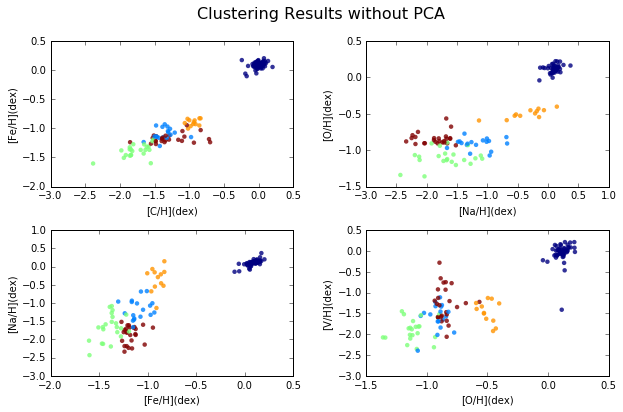

In [6]:
# plot results
fig = plt.figure(figsize=(10, 6), dpi=1000)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax1.scatter(C_H[target], FE_H[target], c=labels, linewidths=0, alpha=0.8)
ax1.set_xlabel("[C/H](dex)")
ax1.set_ylabel("[Fe/H](dex)")

ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax2.scatter(FE_H[target], NA_H[target], c=labels, linewidths=0, alpha=0.8)
ax2.set_xlabel("[Fe/H](dex)")
ax2.set_ylabel("[Na/H](dex)")

ax3 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3.scatter(NA_H[target], O_H[target], c=labels, linewidths=0, alpha=0.8)
ax3.set_xlabel("[Na/H](dex)")
ax3.set_ylabel("[O/H](dex)")

ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
ax4.scatter(O_H[target], V_H[target], c=labels, linewidths=0, alpha=0.8)
ax4.set_xlabel("[O/H](dex)")
ax4.set_ylabel("[V/H](dex)")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Clustering Results without PCA', size=16)
plt.show()

In [7]:
# compose data matrix for targeted known members
pca = PCA(n_components=3)
data = pca.fit_transform(data)
# run KMeans
kmeans = KMeans(5, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
print "v-measure-score is %f"%(v_measure_score(true_labels, labels))

v-measure-score is 0.660724


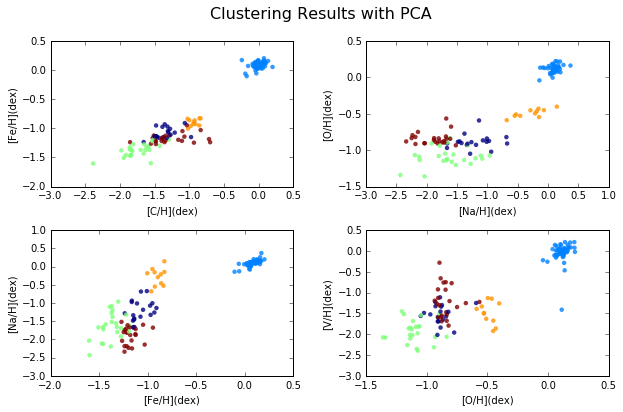

In [8]:
# plot results
fig = plt.figure(figsize=(10, 6), dpi=1000)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax1.scatter(C_H[target], FE_H[target], c=labels, linewidths=0, alpha=0.8)
ax1.set_xlabel("[C/H](dex)")
ax1.set_ylabel("[Fe/H](dex)")

ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax2.scatter(FE_H[target], NA_H[target], c=labels, linewidths=0, alpha=0.8)
ax2.set_xlabel("[Fe/H](dex)")
ax2.set_ylabel("[Na/H](dex)")

ax3 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3.scatter(NA_H[target], O_H[target], c=labels, linewidths=0, alpha=0.8)
ax3.set_xlabel("[Na/H](dex)")
ax3.set_ylabel("[O/H](dex)")

ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
ax4.scatter(O_H[target], V_H[target], c=labels, linewidths=0, alpha=0.8)
ax4.set_xlabel("[O/H](dex)")
ax4.set_ylabel("[V/H](dex)")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Clustering Results with PCA', size=16)
plt.show()

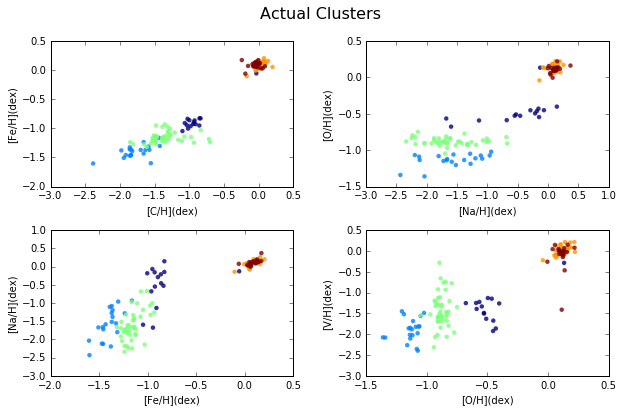

In [9]:
# plot actual clusters
fig = plt.figure(figsize=(10, 6), dpi=1000)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax1.scatter(C_H[target], FE_H[target], c=true_labels, linewidths=0, alpha=0.8)
ax1.set_xlabel("[C/H](dex)")
ax1.set_ylabel("[Fe/H](dex)")

ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax2.scatter(FE_H[target], NA_H[target], c=true_labels, linewidths=0, alpha=0.8)
ax2.set_xlabel("[Fe/H](dex)")
ax2.set_ylabel("[Na/H](dex)")

ax3 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3.scatter(NA_H[target], O_H[target], c=true_labels, linewidths=0, alpha=0.8)
ax3.set_xlabel("[Na/H](dex)")
ax3.set_ylabel("[O/H](dex)")

ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
ax4.scatter(O_H[target], V_H[target], c=true_labels, linewidths=0, alpha=0.8)
ax4.set_xlabel("[O/H](dex)")
ax4.set_ylabel("[V/H](dex)")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Actual Clusters', size=16)
plt.show()

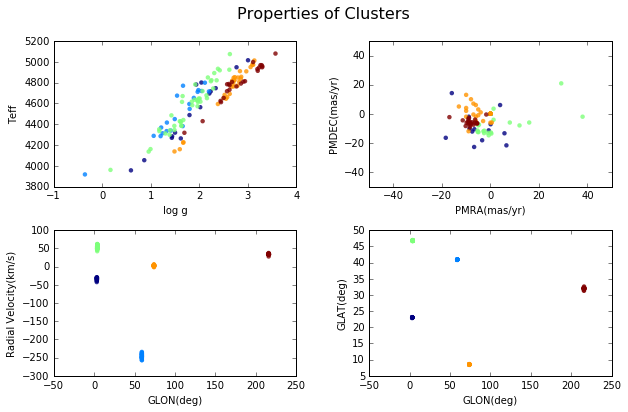

In [10]:
fig = plt.figure(figsize=(10, 6), dpi=1000)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax1.scatter(LOGG[target], TEFF[target], c=true_labels, linewidths=0, alpha=0.8)
ax1.set_xlabel("log g")
ax1.set_ylabel("Teff")

ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax2.scatter(l[target], RV[target], c=true_labels, linewidths=0, alpha=0.8)
ax2.set_xlabel("GLON(deg)")
ax2.set_ylabel("Radial Velocity(km/s)")

ax3 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3.scatter(PMRA[target], PMDEC[target], c=true_labels, linewidths=0, alpha=0.8)
ax3.set_xlim(-50, 50)
ax3.set_ylim(-50, 50)
ax3.set_xlabel("PMRA(mas/yr)")
ax3.set_ylabel("PMDEC(mas/yr)")

ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
ax4.scatter(l[target], b[target], c=true_labels, linewidths=0, alpha=0.8)
ax4.set_xlabel("GLON(deg)")
ax4.set_ylabel("GLAT(deg)")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Properties of Clusters', size=16)
plt.show()

In [11]:
# compose data matrix with chemistry and radial velocity
data = []
data.append(C_H[target])
data.append(FE_H[target])
data.append(N_H[target])
data.append(O_H[target])
data.append(MG_H[target])
data.append(SI_H[target])
data.append(NI_H[target])
data.append(AL_H[target])
data.append(CA_H[target])
data.append(MN_H[target])
data.append(NA_H[target])
data.append(S_H[target])
data.append(K_H[target])
data.append(TI_H[target])
data.append(V_H[target])
data.append(RV[target])
data = np.array(data)
data = data.T
data = StandardScaler().fit_transform(data)

In [12]:
# Kmeans with 15 elements and radial velocity 
kmeans = KMeans(5, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
print "v-measure-score is %f"%(v_measure_score(true_labels, labels))

v-measure-score is 0.719184


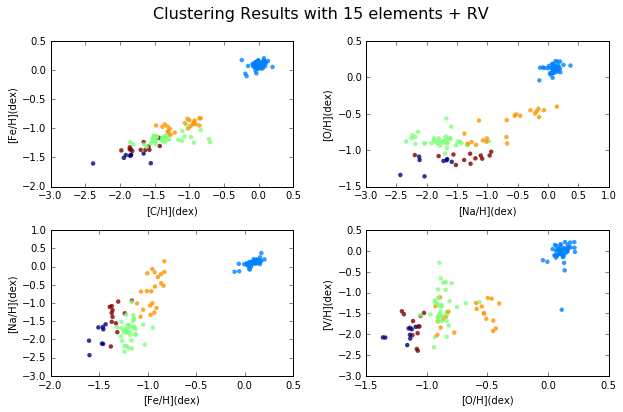

In [13]:
# plot results
fig = plt.figure(figsize=(10, 6), dpi=1000)
ax1 = plt.subplot2grid((2,2), (0,0), rowspan=1, colspan=1)
ax1.scatter(C_H[target], FE_H[target], c=labels, linewidths=0, alpha=0.8)
ax1.set_xlabel("[C/H](dex)")
ax1.set_ylabel("[Fe/H](dex)")

ax2 = plt.subplot2grid((2,2), (1,0), rowspan=1, colspan=1)
ax2.scatter(FE_H[target], NA_H[target], c=labels, linewidths=0, alpha=0.8)
ax2.set_xlabel("[Fe/H](dex)")
ax2.set_ylabel("[Na/H](dex)")

ax3 = plt.subplot2grid((2,2), (0,1), rowspan=1, colspan=1)
ax3.scatter(NA_H[target], O_H[target], c=labels, linewidths=0, alpha=0.8)
ax3.set_xlabel("[Na/H](dex)")
ax3.set_ylabel("[O/H](dex)")

ax4 = plt.subplot2grid((2,2), (1,1), rowspan=1, colspan=1)
ax4.scatter(O_H[target], V_H[target], c=labels, linewidths=0, alpha=0.8)
ax4.set_xlabel("[O/H](dex)")
ax4.set_ylabel("[V/H](dex)")

#plt.tight_layout()
plt.subplots_adjust(wspace=0.3, hspace=0.3)
fig.suptitle('Clustering Results with 15 elements + RV', size=16)
plt.show()

In [14]:
# Kmeans with 15 elements and radial velocity 
kmeans = KMeans(4, n_init=10)
kmeans.fit(data)
labels = kmeans.labels_
print "v-measure-score is %f"%(v_measure_score(true_labels, labels))

v-measure-score is 0.745147
